Transforming over 1000 elements to C_CONTIGUOUS.


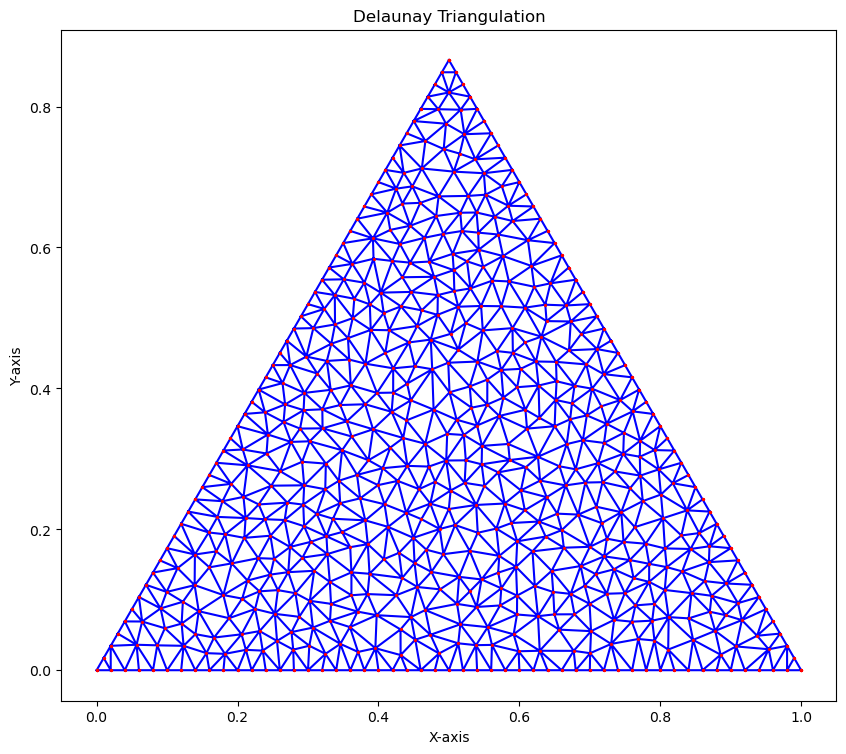

In [25]:
import numpy as np
from skfem import MeshTri
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import distance

# Define vertices of the triangle
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Function to generate boundary points of the triangle
def generate_boundary_points(vertices, num_points_per_edge):
    points = []
    for i in range(3):
        start_vertex = vertices[i]
        end_vertex = vertices[(i + 1) % 3]
        for j in range(num_points_per_edge + 1):
            t = j / num_points_per_edge
            point = (1 - t) * start_vertex + t * end_vertex
            points.append(point)
    return np.array(points)

# Function to generate random points inside the triangle with minimum distance
def generate_interior_points(vertices, num_interior_points, minimum_distance, boundary_points):
    def is_inside_triangle(p, vertices):
        A = vertices[0]
        B = vertices[1]
        C = vertices[2]
        v0 = C - A
        v1 = B - A
        v2 = p - A

        dot00 = np.dot(v0, v0)
        dot01 = np.dot(v0, v1)
        dot02 = np.dot(v0, v2)
        dot11 = np.dot(v1, v1)
        dot12 = np.dot(v1, v2)

        invDenom = 1 / (dot00 * dot11 - dot01 * dot01)
        u = (dot11 * dot02 - dot01 * dot12) * invDenom
        v = (dot00 * dot12 - dot01 * dot02) * invDenom

        return (u >= 0) and (v >= 0) and (u + v < 1)
    
    points = boundary_points.tolist()
    while len(points) < num_interior_points:
        point = np.random.rand(2)
        if is_inside_triangle(point, vertices) and all(distance.euclidean(point, p) >= minimum_distance for p in points):
            points.append(point)
    return np.array(points)

minimum_distance = 0.0225
# Generate boundary points
num_points_per_edge = 50
boundary_points = generate_boundary_points(vertices, num_points_per_edge)

# Generate interior points
num_interior_points = 600
interior_points = generate_interior_points(vertices, num_interior_points, minimum_distance, boundary_points)

# Combine boundary and interior points
all_points = np.vstack((boundary_points, interior_points))

tri = Delaunay(all_points)

mesh = MeshTri(all_points.T, tri.simplices.T)

plt.triplot(all_points[:, 0], all_points[:, 1], tri.simplices, color='blue')
plt.scatter(all_points[:, 0], all_points[:, 1], color='red', s=1.75)
plt.gca().set_aspect(1.0)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Delaunay Triangulation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
